<a href="https://colab.research.google.com/github/iris10130901/AI_Project/blob/main/Selenium_PChome_%E9%81%8B%E7%94%A8_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PChome 抓取爬蟲資料
1. 關鍵字: ASUS筆電 和 ACER 筆電
2. 根據這兩個品牌做文字探勘 看各自比較注重什麼樣的效能或是主打的特點
3. 運用: 想去觀察兩個品牌之間，相同規格( 螢幕大小、CPU、硬碟等) 進行比價


# 1 . 使用Selenium抓取資料

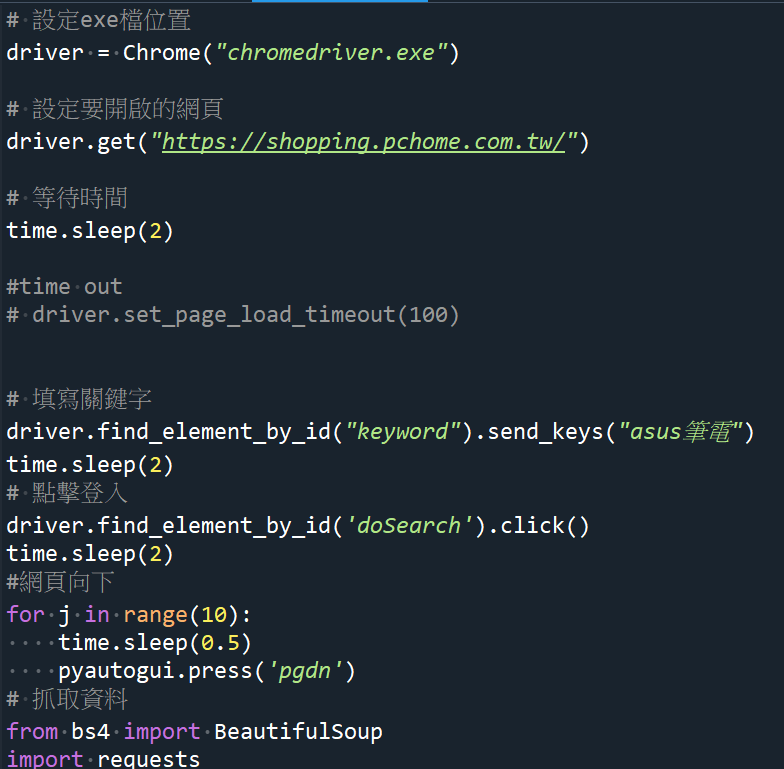

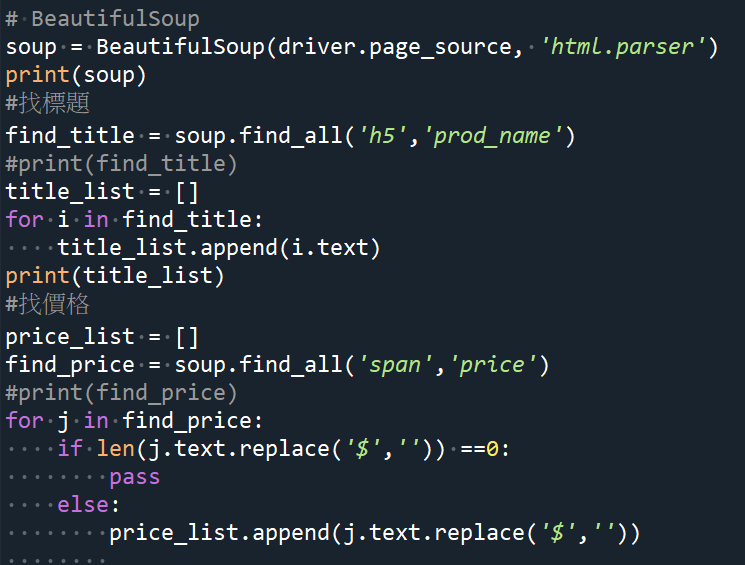

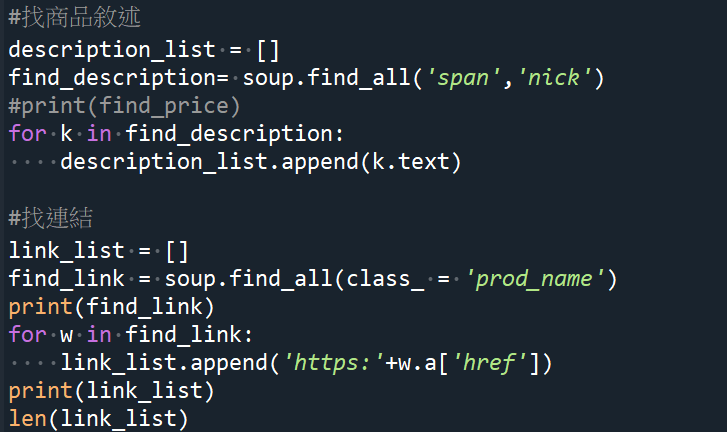

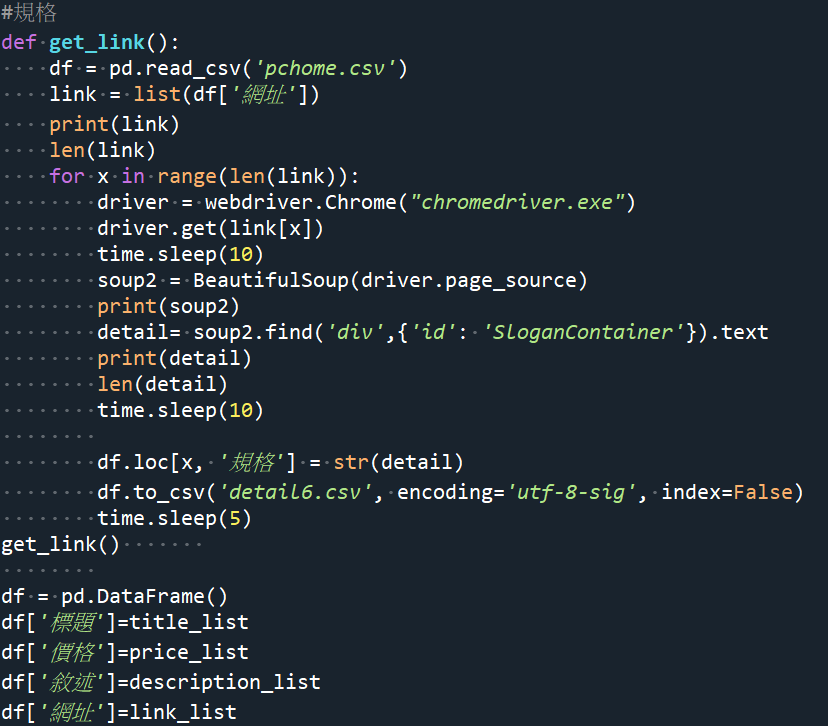

## 爬取結果 (取40筆資料)

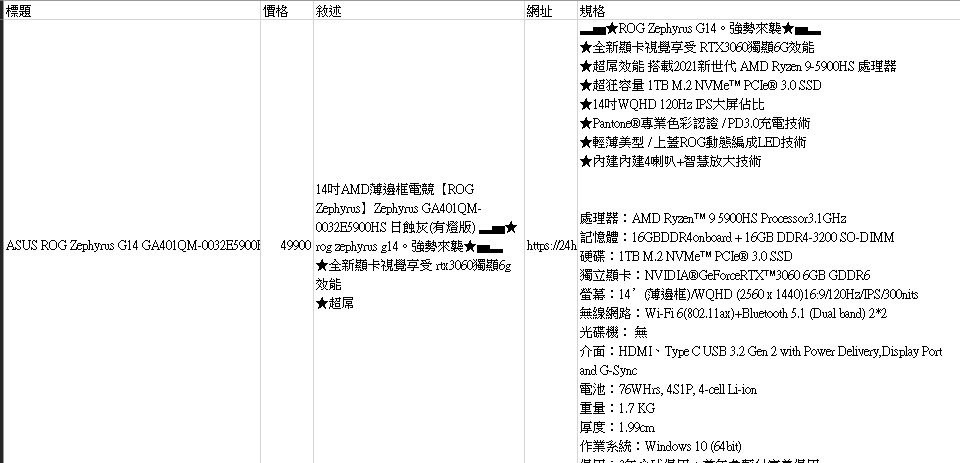

## 查看資料

In [ ]:
import jieba
import csv
import operator
from collections import Counter
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataNLP/ASUS detail all .csv')
df

,標題,價格,敘述,網址,規格
0,ASUS ROG Zephyrus G14 GA401QM-0032E5900HS 日蝕灰(...,49900,14吋AMD薄邊框電競【ROG Zephyrus】Zephyrus GA401QM-0032...,https://24h.pchome.com.tw/prod/DHAS4N-A900B7V2B,▃▅★ROG Zephyrus G14。強勢來襲★▅▃\n★全新顯卡視覺享受 RTX3060...
1,ASUS FA706IC-0062B4600H 戰魂黑(AMD R5-4600H/8G/RT...,27999,▼超人力爸王▼RTX3050獨顯▼送好禮17.3吋AMD薄邊框電競【ASUS TUF Gam...,https://24h.pchome.com.tw/prod/DHAS4J-A900EU2QK,《父親節早鳥爸氣登場》 \n開始：０７／１５（一）１１：００\n結束：０７／２０（一）１０：...
2,ASUS FX506HM-0072B11400H 戰魂黑(i5-11400H/8G/RTX ...,32999,RTX3060獨顯電競【ASUS TUF Gaming】ASUS FX506HM-0072B...,https://24h.pchome.com.tw/prod/DHAS1U-A900EUD1O,▃▅★ASUS TUF Gaming。強勢來襲★▅▃\n★全新顯卡視覺享受 RTX 3060...
3,ASUS ROG Strix G15 G513RC-0042F6800H 潮魂黑(R7-68...,36900,AMD 6000系列★RTX3050獨顯★[Strix G 進化 經典潮流]ROG Stri...,https://24h.pchome.com.tw/prod/DHAS4M-A900E4H9I,▃▅★ASUS ROG STRIX G 。強勢來襲★▅▃ \n★全新升級 144Hz 薄邊框...
4,ASUS ROG Strix SCAR 15 G533ZM-0022S12900H (i9-...,55900,Intel 12代電競★RTX3060獨顯【ROG Strix SCAR 15】 G533Z...,https://24h.pchome.com.tw/prod/DHAS4K-A900DV9GZ,《３Ｃ設備再升級🔥特殺回饋中！》\n網路價$58900．限時價↘$55900\n12代i9★...
5,ROG Flow Z13 GZ301ZC-0091A12700H 無盡黑(i7-12700H...,49999,"▼全球首創13"" 2 in 1觸控電競筆電▼【ROG Flow】Flow Z13 GZ301...",https://24h.pchome.com.tw/prod/DHAS76-A900E4H3Y,▃▅★ROG Flow Z13。強勢來襲★▅▃\n★超屌效能 搭載intel 第12代 i7...
6,ASUS FA707RC-0021B6800H 御鐵灰(AMD R7-6800H/8G/RT...,34900,RTX3050獨顯 AMD處理器【ASUS TUF Gaming】FA707RC-0021B...,https://24h.pchome.com.tw/prod/DHAS4J-A900ENMR2,▃▅★ASUS TUF Gaming。強勢來襲★▅▃\n★全新顯卡視覺享受 RTX3050獨...
7,ROG Zephyrus Flow X13 GV301RE-0022A6900HS(AMD ...,49900,"▼全球首創13"" 翻轉觸控電競筆電▼【ROG Zephyrus】Zephyrus Flow ...",https://24h.pchome.com.tw/prod/DHAS76-A900F7K7A,"▃▅★ROG Zephyrus Flow X13。強勢來襲★▅▃\n★全球首創13""翻轉觸控..."
8,ASUS ROG Zephyrus G14 AW SE GA401QEC-0022G5900...,46900,▼ROG X Alan Walker 聯名款▼【ROG Zephyrus】G14 AW SE...,https://24h.pchome.com.tw/prod/DHAS6K-A900BN2GD,▃▅★ROG Zephyrus G14。強勢來襲★▅▃\n★Alan Walker特殊塗裝\...
9,ASUS ROG Strix G17 G713RW-0022F6900HX(AMD R9-6...,62900,AMD 6000系列★RTX3070 Ti獨顯★PD充電[Strix G 進化 經典潮流]R...,https://24h.pchome.com.tw/prod/DHAS4M-A900F3CY0,▃▅★ASUS ROG STRIX G 。強勢來襲★▅▃ \n★全新升級360Hz薄邊框設計...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   標題      40 non-null     object
 1   價格      40 non-null     int64 
 2   敘述      40 non-null     object
 3   網址      40 non-null     object
 4   規格      40 non-null     object
dtypes: int64(1), object(4)
memory usage: 1.7+ KB


In [ ]:
df.loc[df['價格'] < 1000]

,標題,價格,敘述,網址,規格
27,[ ZERO | 零式創作 ] THOR+ 65W 氮化鎵充電器 筆電 | 平板 | 手機 ...,699,★閃速充電，輕巧隨身行★【ZERO 零式】 THOR+ 65W 氮化鎵充電器 ⚫ 氮化鎵黑科...,https://24h.pchome.com.tw/prod/DCAD6E-A900BSSEF,⚫ 氮化鎵黑科技 \n⚫ Type C+Type C+Type A \n⚫ 筆電+平板+手...
28,[ ZERO | 零式創作 ] THOR+ 65W 氮化鎵充電器 黑色 筆電 | 平板 | ...,699,★閃速充電，輕巧隨身行★【ZERO 零式】 THOR+ 65W 氮化鎵充電器 黑色 ⚫ 氮化...,https://24h.pchome.com.tw/prod/DYBA0X-A900BSZNB,⚫ 氮化鎵黑科技 \n⚫ Type C+Type C+Type A \n⚫ 筆電+平板+手...


## 發現有兩個不是筆電是充電器，故刪除資料

In [ ]:
df.drop(df.loc[df['價格'] < 1000].index, inplace=True)
df

,標題,價格,敘述,網址,規格
0,ASUS ROG Zephyrus G14 GA401QM-0032E5900HS 日蝕灰(...,49900,14吋AMD薄邊框電競【ROG Zephyrus】Zephyrus GA401QM-0032...,https://24h.pchome.com.tw/prod/DHAS4N-A900B7V2B,▃▅★ROG Zephyrus G14。強勢來襲★▅▃\n★全新顯卡視覺享受 RTX3060...
1,ASUS FA706IC-0062B4600H 戰魂黑(AMD R5-4600H/8G/RT...,27999,▼超人力爸王▼RTX3050獨顯▼送好禮17.3吋AMD薄邊框電競【ASUS TUF Gam...,https://24h.pchome.com.tw/prod/DHAS4J-A900EU2QK,《父親節早鳥爸氣登場》 \n開始：０７／１５（一）１１：００\n結束：０７／２０（一）１０：...
2,ASUS FX506HM-0072B11400H 戰魂黑(i5-11400H/8G/RTX ...,32999,RTX3060獨顯電競【ASUS TUF Gaming】ASUS FX506HM-0072B...,https://24h.pchome.com.tw/prod/DHAS1U-A900EUD1O,▃▅★ASUS TUF Gaming。強勢來襲★▅▃\n★全新顯卡視覺享受 RTX 3060...
3,ASUS ROG Strix G15 G513RC-0042F6800H 潮魂黑(R7-68...,36900,AMD 6000系列★RTX3050獨顯★[Strix G 進化 經典潮流]ROG Stri...,https://24h.pchome.com.tw/prod/DHAS4M-A900E4H9I,▃▅★ASUS ROG STRIX G 。強勢來襲★▅▃ \n★全新升級 144Hz 薄邊框...
4,ASUS ROG Strix SCAR 15 G533ZM-0022S12900H (i9-...,55900,Intel 12代電競★RTX3060獨顯【ROG Strix SCAR 15】 G533Z...,https://24h.pchome.com.tw/prod/DHAS4K-A900DV9GZ,《３Ｃ設備再升級🔥特殺回饋中！》\n網路價$58900．限時價↘$55900\n12代i9★...
5,ROG Flow Z13 GZ301ZC-0091A12700H 無盡黑(i7-12700H...,49999,"▼全球首創13"" 2 in 1觸控電競筆電▼【ROG Flow】Flow Z13 GZ301...",https://24h.pchome.com.tw/prod/DHAS76-A900E4H3Y,▃▅★ROG Flow Z13。強勢來襲★▅▃\n★超屌效能 搭載intel 第12代 i7...
6,ASUS FA707RC-0021B6800H 御鐵灰(AMD R7-6800H/8G/RT...,34900,RTX3050獨顯 AMD處理器【ASUS TUF Gaming】FA707RC-0021B...,https://24h.pchome.com.tw/prod/DHAS4J-A900ENMR2,▃▅★ASUS TUF Gaming。強勢來襲★▅▃\n★全新顯卡視覺享受 RTX3050獨...
7,ROG Zephyrus Flow X13 GV301RE-0022A6900HS(AMD ...,49900,"▼全球首創13"" 翻轉觸控電競筆電▼【ROG Zephyrus】Zephyrus Flow ...",https://24h.pchome.com.tw/prod/DHAS76-A900F7K7A,"▃▅★ROG Zephyrus Flow X13。強勢來襲★▅▃\n★全球首創13""翻轉觸控..."
8,ASUS ROG Zephyrus G14 AW SE GA401QEC-0022G5900...,46900,▼ROG X Alan Walker 聯名款▼【ROG Zephyrus】G14 AW SE...,https://24h.pchome.com.tw/prod/DHAS6K-A900BN2GD,▃▅★ROG Zephyrus G14。強勢來襲★▅▃\n★Alan Walker特殊塗裝\...
9,ASUS ROG Strix G17 G713RW-0022F6900HX(AMD R9-6...,62900,AMD 6000系列★RTX3070 Ti獨顯★PD充電[Strix G 進化 經典潮流]R...,https://24h.pchome.com.tw/prod/DHAS4M-A900F3CY0,▃▅★ASUS ROG STRIX G 。強勢來襲★▅▃ \n★全新升級360Hz薄邊框設計...


# 2 . 分析ASUS 筆電相關關鍵字

In [ ]:
jieba.set_dictionary('/content/drive/MyDrive/Colab Notebooks/dataNLP/dict.txt')

In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/dataNLP/stop.txt') as f:
    stops = f.read().split('\n')

In [ ]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/dataNLP')
!pwd 

/content/drive/MyDrive/Colab Notebooks/dataNLP


In [ ]:
import re
import requests
import jieba
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
df_detail = df['規格']
df_detail

0     ▃▅★ROG Zephyrus G14。強勢來襲★▅▃\n★全新顯卡視覺享受 RTX3060...
1     《父親節早鳥爸氣登場》 \n開始：０７／１５（一）１１：００\n結束：０７／２０（一）１０：...
2     ▃▅★ASUS TUF Gaming。強勢來襲★▅▃\n★全新顯卡視覺享受 RTX 3060...
3     ▃▅★ASUS ROG STRIX G 。強勢來襲★▅▃ \n★全新升級 144Hz 薄邊框...
4     《３Ｃ設備再升級🔥特殺回饋中！》\n網路價$58900．限時價↘$55900\n12代i9★...
5     ▃▅★ROG Flow Z13。強勢來襲★▅▃\n★超屌效能 搭載intel 第12代 i7...
6     ▃▅★ASUS TUF Gaming。強勢來襲★▅▃\n★全新顯卡視覺享受 RTX3050獨...
7     ▃▅★ROG Zephyrus Flow X13。強勢來襲★▅▃\n★全球首創13"翻轉觸控...
8     ▃▅★ROG Zephyrus G14。強勢來襲★▅▃\n★Alan Walker特殊塗裝\...
9     ▃▅★ASUS ROG STRIX G 。強勢來襲★▅▃ \n★全新升級360Hz薄邊框設計...
10     ★虛擬數字鍵 /180度螢幕轉軸設計\n★可自行升級M.2 SSD \n★最高電池續航力1...
11    《強強攜手★裝備狠殺》\nCeleron N4020★256G PCIe★文書首選\n\n\...
12    ▃▅★ASUS ROG STRIX SCAR 。強勢來襲★▅▃ \n\n★全新升級300Hz...
13    ▃▅★ASUS TUF Gaming。強勢來襲★▅▃\n★全新顯卡視覺享受 RTX3050獨...
14    ▃▅★ASUS TUF Gaming。強勢來襲★▅▃\n★全新顯卡視覺享受 RTX3050獨...
15    ▃▅★ASUS TUF Gaming。強勢來襲★▅▃\n★全新顯卡視覺享受 RTX3050 ...
16    ▃▅★ASUS TUF Gaming。強勢來襲★▅▃\n★全新顯卡視覺享受 RTX3050獨...
17    《強強攜手★裝備狠殺》\nCeleron N4020★256G PCIe★文書首選\

In [ ]:
import pandas as pd
df_detail =  pd.DataFrame(df_detail)
df_detail

,規格
0,▃▅★ROG Zephyrus G14。強勢來襲★▅▃\n★全新顯卡視覺享受 RTX3060...
1,《父親節早鳥爸氣登場》 \n開始：０７／１５（一）１１：００\n結束：０７／２０（一）１０：...
2,▃▅★ASUS TUF Gaming。強勢來襲★▅▃\n★全新顯卡視覺享受 RTX 3060...
3,▃▅★ASUS ROG STRIX G 。強勢來襲★▅▃ \n★全新升級 144Hz 薄邊框...
4,《３Ｃ設備再升級🔥特殺回饋中！》\n網路價$58900．限時價↘$55900\n12代i9★...
5,▃▅★ROG Flow Z13。強勢來襲★▅▃\n★超屌效能 搭載intel 第12代 i7...
6,▃▅★ASUS TUF Gaming。強勢來襲★▅▃\n★全新顯卡視覺享受 RTX3050獨...
7,"▃▅★ROG Zephyrus Flow X13。強勢來襲★▅▃\n★全球首創13""翻轉觸控..."
8,▃▅★ROG Zephyrus G14。強勢來襲★▅▃\n★Alan Walker特殊塗裝\...
9,▃▅★ASUS ROG STRIX G 。強勢來襲★▅▃ \n★全新升級360Hz薄邊框設計...


In [ ]:
df_detail.to_csv("asus_detail.csv")

In [ ]:
df_description = df['敘述']
df_description

0     14吋AMD薄邊框電競【ROG Zephyrus】Zephyrus GA401QM-0032...
1     ▼超人力爸王▼RTX3050獨顯▼送好禮17.3吋AMD薄邊框電競【ASUS TUF Gam...
2     RTX3060獨顯電競【ASUS TUF Gaming】ASUS FX506HM-0072B...
3     AMD 6000系列★RTX3050獨顯★[Strix G 進化 經典潮流]ROG Stri...
4     Intel 12代電競★RTX3060獨顯【ROG Strix SCAR 15】 G533Z...
5     ▼全球首創13" 2 in 1觸控電競筆電▼【ROG Flow】Flow Z13 GZ301...
6     RTX3050獨顯 AMD處理器【ASUS TUF Gaming】FA707RC-0021B...
7     ▼全球首創13" 翻轉觸控電競筆電▼【ROG Zephyrus】Zephyrus Flow ...
8     ▼ROG X Alan Walker 聯名款▼【ROG Zephyrus】G14 AW SE...
9     AMD 6000系列★RTX3070 Ti獨顯★PD充電[Strix G 進化 經典潮流]R...
10    ASUS E410MA-0631WN4020 夢幻白14吋輕薄文書筆電★內附Microsof...
11    大尺寸FHD螢幕x更輕更薄 僅1.8kgASUS X515MA-0521SN4020 冰河銀...
12    ▼12代新上市★RTX 3070 Ti獨顯▼【ROG Strix SCAR 15】 G533...
13    RTX3050獨顯★加碼送好禮二選一15.6吋AMD薄邊框電競【ASUS TUF Gamin...
14    RTX3050獨顯★加碼送好禮15.6吋AMD薄邊框電競【ASUS TUF Gaming】\...
15    15.6吋AMD薄邊框電競【ASUS TUF Gaming】ASUS FA507RE-003...
16    RTX3050獨顯▼加碼送好禮17.3吋AMD薄邊框電競【ASUS TUF Gaming】F...
17    大尺寸FHD螢幕x更輕更薄 僅1.8kgASUS X515MA-0491GN4020

In [ ]:
df_description.to_csv("asus_description.csv")

In [ ]:
with open('asus_description.csv',encoding='utf-8-sig') as csvfile:
  rows = csv.reader(csvfile)
  for row in rows:
        row = str(row)
        #刪除無意義字
        row = row.replace("n","") 
        row = row.replace("\\","")
        row = row.replace(" ","")
        row = row.replace("'","")
        row = row.replace("、","")
        row = row.replace("[","")
        row = row.replace("]","")
        row = row.replace("（","")
        row = row.replace("）","")
        row = row.replace("《","")
        row = row.replace("》","")
        row = row.replace("～","")
        row = row.replace("★","")
        row = row.replace("▃","")
        row = row.replace("▅","")
        row = row.replace("◤","")
        row = row.replace("◢","")
        row = row.replace("⚫","")
        row = row.replace("●","")
        row = row.replace("-","")
        row = row.replace("▼","")
        row = row.replace("【","")
        row = row.replace("】","")

        


        corpus = []                # corpus 語料庫
        # 開始結jieba分詞並去除不要的字
        # cut_all=False 精确模式
        corpus += [t for t in jieba.cut(row, cut_all=False) if t not in stops]
        # 創個空的dictionary
        dic = {}
        for ele in corpus:
            if ele not in dic:
                dic[ele] = 1
            else:
                dic[ele] = dic[ele] + 1
        # 顯示切字的結果
        sorted_word = sorted(dic.items(), key=operator.itemgetter(1), reverse=True)
        print(sorted_word)
        with open('asus-1.csv', 'a', encoding='utf-8-sig') as wf2:
            for ele in sorted_word:
                # 這行是表示我要2個字以上的句子
                if len(ele[0]) >= 2:
                    world = ele[0] + ','
                    wf2.write(world)

Building prefix dict from /content/drive/MyDrive/Colab Notebooks/dataNLP/dict.txt ...
Dumping model to file cache /tmp/jieba.u4ec78da610829c15e42042d8a054c06a.cache
Loading model cost 1.684 seconds.
Prefix dict has been built successfully.


[('敘述', 1)]
[('0', 1), ('14', 1), ('吋', 1), ('AMD', 1), ('薄', 1), ('邊框', 1), ('電競', 1), ('ROGZephyrusZephyrusGA401QM0032E5900HS', 1), ('日蝕', 1), ('灰', 1), ('(', 1), ('有', 1), ('燈版', 1), (')', 1), ('rogzephyrusg14', 1), ('強勢', 1), ('來襲', 1), ('全新', 1), ('顯卡', 1), ('視覺', 1), ('享受', 1), ('rtx3060', 1), ('獨顯', 1), ('6g', 1), ('效能', 1), ('超屌', 1)]
[('０', 5), ('１', 3), ('７', 2), ('／', 2), ('一', 2), ('1', 1), ('超', 1), ('人力', 1), ('爸王', 1), ('RTX3050', 1), ('獨顯', 1), ('送', 1), ('好禮', 1), ('17.3', 1), ('吋', 1), ('AMD', 1), ('薄', 1), ('邊框', 1), ('電競', 1), ('ASUSTUFGamigASUSFA706IC0062B4600H', 1), ('戰魂', 1), ('黑', 1), ('父親節', 1), ('早鳥', 1), ('爸氣', 1), ('登場', 1), ('開始', 1), ('５', 1), ('結束', 1), ('２', 1)]
[('2', 2), ('獨顯', 2), ('效能', 2), ('RTX3060', 1), ('電競', 1), ('ASUSTUFGamigASUSFX506HM0072B11400H', 1), ('戰魂', 1), ('黑', 1), ('asustufgamig', 1), ('強勢', 1), ('來襲', 1), ('全新', 1), ('顯卡', 1), ('視覺', 1), ('享受', 1), ('rtx3060', 1), ('6g', 1), ('超屌', 1), ('搭載', 1)]
[('3', 1), ('AMD6000', 1), ('系列', 1),

In [ ]:
house = open('asus-1.csv', encoding='utf-8-sig').read()
# 將讀取的檔案內之字單獨分開
list1 = house.split(',')
# 計算出現次數
dir1 = Counter(list1)

In [ ]:
list1

['規格',
 '技術',
 '保固',
 '顯卡',
 '效能',
 '處理器',
 '1TBM.2',
 'NVMe',
 'PCIe',
 '3.0',
 '內建',
 'ROGZephyrusG14',
 '強勢',
 '來襲',
 '全新',
 '視覺',
 '享受',
 'RTX3060',
 '獨顯',
 '6G',
 '超屌',
 '搭載',
 '2021',
 '新世代',
 'AMDRyze9',
 '5900HS',
 '超狂',
 '容量',
 'SSD14',
 'WQHD120HzIPS',
 '大屏',
 '佔比',
 'Patoe',
 '專業',
 '色彩',
 '認證',
 'PD3.0',
 '充電',
 '輕薄',
 '美型',
 '上蓋',
 'ROG',
 '動態',
 '編成',
 'LED',
 '喇叭',
 '智慧',
 '放大',
 'AMDRyze',
 '95900HSProcessorxa03.1',
 'xa0GHz',
 '記憶體',
 '16GBxa0DDR4xa0oxa0board',
 '16GBDDR4',
 '3200SO',
 'DIMM',
 '硬碟',
 'SSD',
 '獨立',
 'NVIDIA',
 'xa0GeForcexa0RTX',
 'xa030606GBGDDR6',
 '螢幕',
 '14',
 '邊框',
 'WQHD',
 '2560x1440',
 '16',
 '120Hz',
 'IPS',
 '300its',
 '無線',
 '網路',
 'Wi',
 'Fi6',
 '802.11',
 'ax',
 'Bluetooth5.1',
 'Dualbad',
 '光碟機',
 '介面',
 'HDMITypeCUSB3.2',
 'Ge2withPowerDelivery',
 'DisplayPortadG',
 'Syc',
 '電池',
 '76WHrs',
 '4S1P',
 'cellLi',
 'io',
 '重量',
 '1.7',
 'KG',
 '厚度',
 '1.99',
 'cm',
 '作業',
 '系統',
 'Widows10',
 '64bit',
 '全球',
 '首年',
 '預付',
 '完美',
 '商品',
 '詳細'

In [ ]:
dir1

Counter({'規格': 62,
         '技術': 30,
         '保固': 68,
         '顯卡': 84,
         '效能': 70,
         '處理器': 120,
         '1TBM.2': 16,
         'NVMe': 62,
         'PCIe': 62,
         '3.0': 46,
         '內建': 6,
         'ROGZephyrusG14': 6,
         '強勢': 98,
         '來襲': 98,
         '全新': 82,
         '視覺': 64,
         '享受': 64,
         'RTX3060': 22,
         '獨顯': 96,
         '6G': 10,
         '超屌': 60,
         '搭載': 40,
         '2021': 10,
         '新世代': 10,
         'AMDRyze9': 4,
         '5900HS': 4,
         '超狂': 26,
         '容量': 42,
         'SSD14': 6,
         'WQHD120HzIPS': 6,
         '大屏': 20,
         '佔比': 38,
         'Patoe': 12,
         '專業': 20,
         '色彩': 12,
         '認證': 24,
         'PD3.0': 20,
         '充電': 40,
         '輕薄': 24,
         '美型': 4,
         '上蓋': 6,
         'ROG': 2,
         '動態': 2,
         '編成': 6,
         'LED': 6,
         '喇叭': 6,
         '智慧': 10,
         '放大': 6,
         'AMDRyze': 28,
         '95900H

In [ ]:
# 將值寫入csv檔中
with open('asus-2.csv', encoding='utf-8-sig', mode='w') as fp:
    fp.write('關鍵字,值,\n')
    for tag, count in dir1.items():
        fp.write('{},{}\n'.format(tag, count))

In [ ]:
df2 = pd.set_option('display.max_rows', None)

In [ ]:
df2 = pd.read_csv('asus-2.csv', index_col="值")

In [ ]:
df2 = df2.sort_index(axis=0, ascending=False)
df2

,關鍵字,Unnamed: 2
值,,
120,處理器,NaN
116,螢幕,NaN
116,邊框,NaN
114,筆電,NaN
98,來襲,NaN
98,強勢,NaN
96,獨顯,NaN
92,記憶體,NaN
90,電競,NaN


Building prefix dict from /content/drive/MyDrive/Colab Notebooks/dataNLP/dict.txt ...
Loading model from cache /tmp/jieba.u4ec78da610829c15e42042d8a054c06a.cache
Loading model cost 1.332 seconds.
Prefix dict has been built successfully.


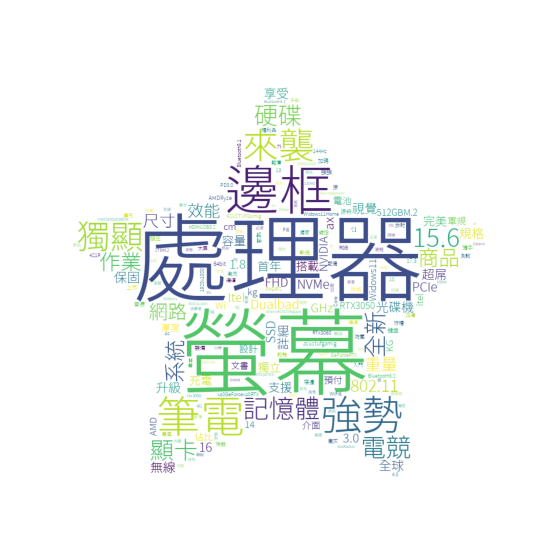

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import jieba
from collections import Counter
from PIL import Image
import numpy as np
import requests
text = open('asus-1.csv', "r",encoding="utf-8").read()
jieba.set_dictionary('dict.txt')
#with open('stopWord_cloud.txt', 'r', encoding='utf-8-sig') as f:
with open('stop.txt', 'r', encoding='utf-8-sig') as f:
    stops = f.read().split('\n')   
terms = []
for t in jieba.cut(text, cut_all=False):
    if t not in stops:
        terms.append(t)
diction = Counter(terms)
fontfile = requests.get("https://drive.google.com/uc?id=1QdaqR8Setf4HEulrIW79UEV_Lg_fuoWz&export=download")
with open('taipei_sans_tc_beta.ttf', 'wb') as f:
  f.write(fontfile.content)
#wordcloud = WordCloud(font_path='taipei_sans_tc_beta.ttf') 
mask = np.array(Image.open("star2.jpg")) 
wordcloud = WordCloud(background_color="white",mask=mask,font_path='taipei_sans_tc_beta.ttf') 
wordcloud.generate_from_frequencies(frequencies=diction)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
wordcloud.to_file("bookCloud.png")

# 3 . 分析規格比價


- 找出15.6吋筆電 :有19台

In [ ]:
#查看'規格'當中是否有'15.6'字串
df['規格'].str.count('15.6').value_counts()

0    19
1    17
2     2
Name: 規格, dtype: int64

In [ ]:
df.loc[df['規格'].str.count('15.6')]

,標題,價格,敘述,網址,規格
0,ASUS ROG Zephyrus G14 GA401QM-0032E5900HS 日蝕灰(...,49900,14吋AMD薄邊框電競【ROG Zephyrus】Zephyrus GA401QM-0032...,https://24h.pchome.com.tw/prod/DHAS4N-A900B7V2B,▃▅★ROG Zephyrus G14。強勢來襲★▅▃\n★全新顯卡視覺享受 RTX3060...
0,ASUS ROG Zephyrus G14 GA401QM-0032E5900HS 日蝕灰(...,49900,14吋AMD薄邊框電競【ROG Zephyrus】Zephyrus GA401QM-0032...,https://24h.pchome.com.tw/prod/DHAS4N-A900B7V2B,▃▅★ROG Zephyrus G14。強勢來襲★▅▃\n★全新顯卡視覺享受 RTX3060...
1,ASUS FA706IC-0062B4600H 戰魂黑(AMD R5-4600H/8G/RT...,27999,▼超人力爸王▼RTX3050獨顯▼送好禮17.3吋AMD薄邊框電競【ASUS TUF Gam...,https://24h.pchome.com.tw/prod/DHAS4J-A900EU2QK,《父親節早鳥爸氣登場》 \n開始：０７／１５（一）１１：００\n結束：０７／２０（一）１０：...
1,ASUS FA706IC-0062B4600H 戰魂黑(AMD R5-4600H/8G/RT...,27999,▼超人力爸王▼RTX3050獨顯▼送好禮17.3吋AMD薄邊框電競【ASUS TUF Gam...,https://24h.pchome.com.tw/prod/DHAS4J-A900EU2QK,《父親節早鳥爸氣登場》 \n開始：０７／１５（一）１１：００\n結束：０７／２０（一）１０：...
1,ASUS FA706IC-0062B4600H 戰魂黑(AMD R5-4600H/8G/RT...,27999,▼超人力爸王▼RTX3050獨顯▼送好禮17.3吋AMD薄邊框電競【ASUS TUF Gam...,https://24h.pchome.com.tw/prod/DHAS4J-A900EU2QK,《父親節早鳥爸氣登場》 \n開始：０７／１５（一）１１：００\n結束：０７／２０（一）１０：...
0,ASUS ROG Zephyrus G14 GA401QM-0032E5900HS 日蝕灰(...,49900,14吋AMD薄邊框電競【ROG Zephyrus】Zephyrus GA401QM-0032...,https://24h.pchome.com.tw/prod/DHAS4N-A900B7V2B,▃▅★ROG Zephyrus G14。強勢來襲★▅▃\n★全新顯卡視覺享受 RTX3060...
0,ASUS ROG Zephyrus G14 GA401QM-0032E5900HS 日蝕灰(...,49900,14吋AMD薄邊框電競【ROG Zephyrus】Zephyrus GA401QM-0032...,https://24h.pchome.com.tw/prod/DHAS4N-A900B7V2B,▃▅★ROG Zephyrus G14。強勢來襲★▅▃\n★全新顯卡視覺享受 RTX3060...
0,ASUS ROG Zephyrus G14 GA401QM-0032E5900HS 日蝕灰(...,49900,14吋AMD薄邊框電競【ROG Zephyrus】Zephyrus GA401QM-0032...,https://24h.pchome.com.tw/prod/DHAS4N-A900B7V2B,▃▅★ROG Zephyrus G14。強勢來襲★▅▃\n★全新顯卡視覺享受 RTX3060...
0,ASUS ROG Zephyrus G14 GA401QM-0032E5900HS 日蝕灰(...,49900,14吋AMD薄邊框電競【ROG Zephyrus】Zephyrus GA401QM-0032...,https://24h.pchome.com.tw/prod/DHAS4N-A900B7V2B,▃▅★ROG Zephyrus G14。強勢來襲★▅▃\n★全新顯卡視覺享受 RTX3060...
0,ASUS ROG Zephyrus G14 GA401QM-0032E5900HS 日蝕灰(...,49900,14吋AMD薄邊框電競【ROG Zephyrus】Zephyrus GA401QM-0032...,https://24h.pchome.com.tw/prod/DHAS4N-A900B7V2B,▃▅★ROG Zephyrus G14。強勢來襲★▅▃\n★全新顯卡視覺享受 RTX3060...


- 找出硬碟容量512GB規格: 有21台

In [ ]:
#查看'規格'當中是否有'512GB'字串
df['規格'].str.count('512GB').value_counts()

0    17
1    11
2    10
Name: 規格, dtype: int64

### 處理器

In [ ]:
df['規格'].str.count('AMD').value_counts()

0    23
2    14
1     1
Name: 規格, dtype: int64

In [ ]:
df['規格'].str.count('i5').value_counts()

0    30
1     6
2     2
Name: 規格, dtype: int64

In [ ]:
df['規格'].str.count('i7').value_counts()

0    32
1     4
2     2
Name: 規格, dtype: int64

In [ ]:
df['規格'].str.count('i9').value_counts()

0    36
3     1
2     1
Name: 規格, dtype: int64

In [ ]:
df['規格'].str.count('Celeron').value_counts()

0    31
2     4
1     3
Name: 規格, dtype: int64

In [ ]:
15+8+6+2+7

38

- 64位元系統 :有14台

In [ ]:
df['規格'].str.count('64bit').value_counts()

0    24
1    14
Name: 規格, dtype: int64

- 查看是否為"ASUS TUF Gaming"電競系列

In [ ]:
df['規格'].str.count('ASUS TUF Gaming').value_counts()

0    29
1     9
Name: 規格, dtype: int64

In [ ]:
df['價格'].describe()

count       38.000000
mean     36140.947368
std      16800.345331
min      10900.000000
25%      27999.000000
50%      35400.000000
75%      44749.000000
max      91265.000000
Name: 價格, dtype: float64

In [ ]:
df['敘述'].str.count('電競').value_counts()

1    18
0    17
2     3
Name: 敘述, dtype: int64

## 假設今天預算是40000

## 1 . 先篩選出低於40000的筆電

In [ ]:
fliter_list = df.loc[df['價格'] < 40000]
fliter_list

,標題,價格,敘述,網址,規格
1,ASUS FA706IC-0062B4600H 戰魂黑(AMD R5-4600H/8G/RT...,27999,▼超人力爸王▼RTX3050獨顯▼送好禮17.3吋AMD薄邊框電競【ASUS TUF Gam...,https://24h.pchome.com.tw/prod/DHAS4J-A900EU2QK,《父親節早鳥爸氣登場》 \n開始：０７／１５（一）１１：００\n結束：０７／２０（一）１０：...
2,ASUS FX506HM-0072B11400H 戰魂黑(i5-11400H/8G/RTX ...,32999,RTX3060獨顯電競【ASUS TUF Gaming】ASUS FX506HM-0072B...,https://24h.pchome.com.tw/prod/DHAS1U-A900EUD1O,▃▅★ASUS TUF Gaming。強勢來襲★▅▃\n★全新顯卡視覺享受 RTX 3060...
3,ASUS ROG Strix G15 G513RC-0042F6800H 潮魂黑(R7-68...,36900,AMD 6000系列★RTX3050獨顯★[Strix G 進化 經典潮流]ROG Stri...,https://24h.pchome.com.tw/prod/DHAS4M-A900E4H9I,▃▅★ASUS ROG STRIX G 。強勢來襲★▅▃ \n★全新升級 144Hz 薄邊框...
6,ASUS FA707RC-0021B6800H 御鐵灰(AMD R7-6800H/8G/RT...,34900,RTX3050獨顯 AMD處理器【ASUS TUF Gaming】FA707RC-0021B...,https://24h.pchome.com.tw/prod/DHAS4J-A900ENMR2,▃▅★ASUS TUF Gaming。強勢來襲★▅▃\n★全新顯卡視覺享受 RTX3050獨...
10,ASUS E410MA-0631WN4020 夢幻白(Celeron N4020/4G/12...,10900,ASUS E410MA-0631WN4020 夢幻白14吋輕薄文書筆電★內附Microsof...,https://24h.pchome.com.tw/prod/DHAFI0-A900BNQ7N,★虛擬數字鍵 /180度螢幕轉軸設計\n★可自行升級M.2 SSD \n★最高電池續航力1...
11,ASUS X515MA-0521SN4020 冰河銀(Celeron N4020/4G/25...,12900,大尺寸FHD螢幕x更輕更薄 僅1.8kgASUS X515MA-0521SN4020 冰河銀...,https://24h.pchome.com.tw/prod/DHAFM7-A900DZM01,《強強攜手★裝備狠殺》\nCeleron N4020★256G PCIe★文書首選\n\n\...
13,ASUS FA506IC-0122B4800H 戰魂黑(AMD R7-4800H/8G/RT...,28999,RTX3050獨顯★加碼送好禮二選一15.6吋AMD薄邊框電競【ASUS TUF Gamin...,https://24h.pchome.com.tw/prod/DHAS4J-A900ENMQ4,▃▅★ASUS TUF Gaming。強勢來襲★▅▃\n★全新顯卡視覺享受 RTX3050獨...
14,ASUS FA506ICB-0132B4800H 戰魂黑(AMD R7-4800H/8G/R...,28999,RTX3050獨顯★加碼送好禮15.6吋AMD薄邊框電競【ASUS TUF Gaming】\...,https://24h.pchome.com.tw/prod/DHAS4J-A900F36BJ,▃▅★ASUS TUF Gaming。強勢來襲★▅▃\n★全新顯卡視覺享受 RTX3050獨...
15,ASUS FA507RE-0031B6800H 御鐵灰(AMD R7-6800H/8GB*2...,35900,15.6吋AMD薄邊框電競【ASUS TUF Gaming】ASUS FA507RE-003...,https://24h.pchome.com.tw/prod/DHAS4J-A900EW29L,▃▅★ASUS TUF Gaming。強勢來襲★▅▃\n★全新顯卡視覺享受 RTX3050 ...
16,ASUS FA706ICB-0092B4600H 戰魂黑(AMD R5-4600H/8G/R...,27999,RTX3050獨顯▼加碼送好禮17.3吋AMD薄邊框電競【ASUS TUF Gaming】F...,https://24h.pchome.com.tw/prod/DHAS4J-A900F38A9,▃▅★ASUS TUF Gaming。強勢來襲★▅▃\n★全新顯卡視覺享受 RTX3050獨...


In [ ]:
len(fliter_list)

25

## 2 . 看規格當中是否有符合 15.6吋螢幕、AMD處理器、記憶體大小

### 15.6吋螢幕

In [ ]:
data1 = fliter_list[fliter_list['規格'].str.contains('15.6')]
data1

,標題,價格,敘述,網址,規格
2,ASUS FX506HM-0072B11400H 戰魂黑(i5-11400H/8G/RTX ...,32999,RTX3060獨顯電競【ASUS TUF Gaming】ASUS FX506HM-0072B...,https://24h.pchome.com.tw/prod/DHAS1U-A900EUD1O,▃▅★ASUS TUF Gaming。強勢來襲★▅▃\n★全新顯卡視覺享受 RTX 3060...
3,ASUS ROG Strix G15 G513RC-0042F6800H 潮魂黑(R7-68...,36900,AMD 6000系列★RTX3050獨顯★[Strix G 進化 經典潮流]ROG Stri...,https://24h.pchome.com.tw/prod/DHAS4M-A900E4H9I,▃▅★ASUS ROG STRIX G 。強勢來襲★▅▃ \n★全新升級 144Hz 薄邊框...
11,ASUS X515MA-0521SN4020 冰河銀(Celeron N4020/4G/25...,12900,大尺寸FHD螢幕x更輕更薄 僅1.8kgASUS X515MA-0521SN4020 冰河銀...,https://24h.pchome.com.tw/prod/DHAFM7-A900DZM01,《強強攜手★裝備狠殺》\nCeleron N4020★256G PCIe★文書首選\n\n\...
13,ASUS FA506IC-0122B4800H 戰魂黑(AMD R7-4800H/8G/RT...,28999,RTX3050獨顯★加碼送好禮二選一15.6吋AMD薄邊框電競【ASUS TUF Gamin...,https://24h.pchome.com.tw/prod/DHAS4J-A900ENMQ4,▃▅★ASUS TUF Gaming。強勢來襲★▅▃\n★全新顯卡視覺享受 RTX3050獨...
14,ASUS FA506ICB-0132B4800H 戰魂黑(AMD R7-4800H/8G/R...,28999,RTX3050獨顯★加碼送好禮15.6吋AMD薄邊框電競【ASUS TUF Gaming】\...,https://24h.pchome.com.tw/prod/DHAS4J-A900F36BJ,▃▅★ASUS TUF Gaming。強勢來襲★▅▃\n★全新顯卡視覺享受 RTX3050獨...
15,ASUS FA507RE-0031B6800H 御鐵灰(AMD R7-6800H/8GB*2...,35900,15.6吋AMD薄邊框電競【ASUS TUF Gaming】ASUS FA507RE-003...,https://24h.pchome.com.tw/prod/DHAS4J-A900EW29L,▃▅★ASUS TUF Gaming。強勢來襲★▅▃\n★全新顯卡視覺享受 RTX3050 ...
17,ASUS X515MA-0491GN4020 星空灰(Celeron N4020/4G/25...,12900,大尺寸FHD螢幕x更輕更薄 僅1.8kgASUS X515MA-0491GN4020 星空灰...,https://24h.pchome.com.tw/prod/DHAFM7-A900DXID9,《強強攜手★裝備狠殺》\nCeleron N4020★256G PCIe★文書首選\n\n\...
18,ASUS FA507RM-0021B6800H 御鐵灰(AMD R7-6800H/8GB/R...,39900,15.6吋AMD薄邊框電競【ASUS TUF Gaming】ASUS FA507RM-002...,https://24h.pchome.com.tw/prod/DHAS4J-A900F15NU,▃▅★ASUS TUF Gaming。強勢來襲★▅▃\n★全新顯卡視覺享受 RTX3060獨...
22,ASUS X515KA-0201GN5100 星空灰(Celeron N5100/4G/25...,14900,大尺寸FHD螢幕x更輕更薄 僅1.46kgASUS X515KA-0201GN5100 星空...,https://24h.pchome.com.tw/prod/DHAFM7-A900ENSVH,★Intel 四核心處理器 N5100\n★窄邊框7mm /83%屏佔比\n★易擴充 可升...
24,ASUS X515MA-0561GN4020 星空灰(Celeron N4020/8G/25...,14900,大尺寸FHD螢幕x升級8G記憶體 僅1.8kgX515MA-0561GN4020 星空灰15...,https://24h.pchome.com.tw/prod/DHAFM7-A900F9BYT,《強強攜手★裝備狠殺》\nCeleron N4020★256G PCIe★文書首選\n\n處...


### AMD的處理器 在4000元以下 為15.6吋大小的清單:

In [ ]:
data2 = data1[data1['規格'].str.contains('AMD')]
data2

,標題,價格,敘述,網址,規格
3,ASUS ROG Strix G15 G513RC-0042F6800H 潮魂黑(R7-68...,36900,AMD 6000系列★RTX3050獨顯★[Strix G 進化 經典潮流]ROG Stri...,https://24h.pchome.com.tw/prod/DHAS4M-A900E4H9I,▃▅★ASUS ROG STRIX G 。強勢來襲★▅▃ \n★全新升級 144Hz 薄邊框...
13,ASUS FA506IC-0122B4800H 戰魂黑(AMD R7-4800H/8G/RT...,28999,RTX3050獨顯★加碼送好禮二選一15.6吋AMD薄邊框電競【ASUS TUF Gamin...,https://24h.pchome.com.tw/prod/DHAS4J-A900ENMQ4,▃▅★ASUS TUF Gaming。強勢來襲★▅▃\n★全新顯卡視覺享受 RTX3050獨...
14,ASUS FA506ICB-0132B4800H 戰魂黑(AMD R7-4800H/8G/R...,28999,RTX3050獨顯★加碼送好禮15.6吋AMD薄邊框電競【ASUS TUF Gaming】\...,https://24h.pchome.com.tw/prod/DHAS4J-A900F36BJ,▃▅★ASUS TUF Gaming。強勢來襲★▅▃\n★全新顯卡視覺享受 RTX3050獨...
15,ASUS FA507RE-0031B6800H 御鐵灰(AMD R7-6800H/8GB*2...,35900,15.6吋AMD薄邊框電競【ASUS TUF Gaming】ASUS FA507RE-003...,https://24h.pchome.com.tw/prod/DHAS4J-A900EW29L,▃▅★ASUS TUF Gaming。強勢來襲★▅▃\n★全新顯卡視覺享受 RTX3050 ...
18,ASUS FA507RM-0021B6800H 御鐵灰(AMD R7-6800H/8GB/R...,39900,15.6吋AMD薄邊框電競【ASUS TUF Gaming】ASUS FA507RM-002...,https://24h.pchome.com.tw/prod/DHAS4J-A900F15NU,▃▅★ASUS TUF Gaming。強勢來襲★▅▃\n★全新顯卡視覺享受 RTX3060獨...


### 發現我們篩選出來的同樣是AMD處理器當中 分為 AMD Ryzen 7 4800H vs AMD Ryzen 7 6800H

In [ ]:
data3 = data2[data2['標題'].str.contains('6800H')]
data3

,標題,價格,敘述,網址,規格
3,ASUS ROG Strix G15 G513RC-0042F6800H 潮魂黑(R7-68...,36900,AMD 6000系列★RTX3050獨顯★[Strix G 進化 經典潮流]ROG Stri...,https://24h.pchome.com.tw/prod/DHAS4M-A900E4H9I,▃▅★ASUS ROG STRIX G 。強勢來襲★▅▃ \n★全新升級 144Hz 薄邊框...
15,ASUS FA507RE-0031B6800H 御鐵灰(AMD R7-6800H/8GB*2...,35900,15.6吋AMD薄邊框電競【ASUS TUF Gaming】ASUS FA507RE-003...,https://24h.pchome.com.tw/prod/DHAS4J-A900EW29L,▃▅★ASUS TUF Gaming。強勢來襲★▅▃\n★全新顯卡視覺享受 RTX3050 ...
18,ASUS FA507RM-0021B6800H 御鐵灰(AMD R7-6800H/8GB/R...,39900,15.6吋AMD薄邊框電競【ASUS TUF Gaming】ASUS FA507RM-002...,https://24h.pchome.com.tw/prod/DHAS4J-A900F15NU,▃▅★ASUS TUF Gaming。強勢來襲★▅▃\n★全新顯卡視覺享受 RTX3060獨...


In [ ]:
data4 = data2[data2['標題'].str.contains('4800H')]
data4

,標題,價格,敘述,網址,規格
13,ASUS FA506IC-0122B4800H 戰魂黑(AMD R7-4800H/8G/RT...,28999,RTX3050獨顯★加碼送好禮二選一15.6吋AMD薄邊框電競【ASUS TUF Gamin...,https://24h.pchome.com.tw/prod/DHAS4J-A900ENMQ4,▃▅★ASUS TUF Gaming。強勢來襲★▅▃\n★全新顯卡視覺享受 RTX3050獨...
14,ASUS FA506ICB-0132B4800H 戰魂黑(AMD R7-4800H/8G/R...,28999,RTX3050獨顯★加碼送好禮15.6吋AMD薄邊框電競【ASUS TUF Gaming】\...,https://24h.pchome.com.tw/prod/DHAS4J-A900F36BJ,▃▅★ASUS TUF Gaming。強勢來襲★▅▃\n★全新顯卡視覺享受 RTX3050獨...


## 可以得出，6800H的處理器比4800H的處理器貴了將近1萬元

### 繼續比較記憶體為8GB或16GB

## 結論1: 如果要購買符合以下規格的筆電:
- 15.6吋
- 記憶體 16GB
- AMD R7-6800H 
- SSD 512GB

可以選擇 ASUS FA507RE-0031B6800H 御鐵灰(AMD R7-6800H/8GB*2/RTX3050Ti-4G/512G PCIe/W11/FHD/144Hz)

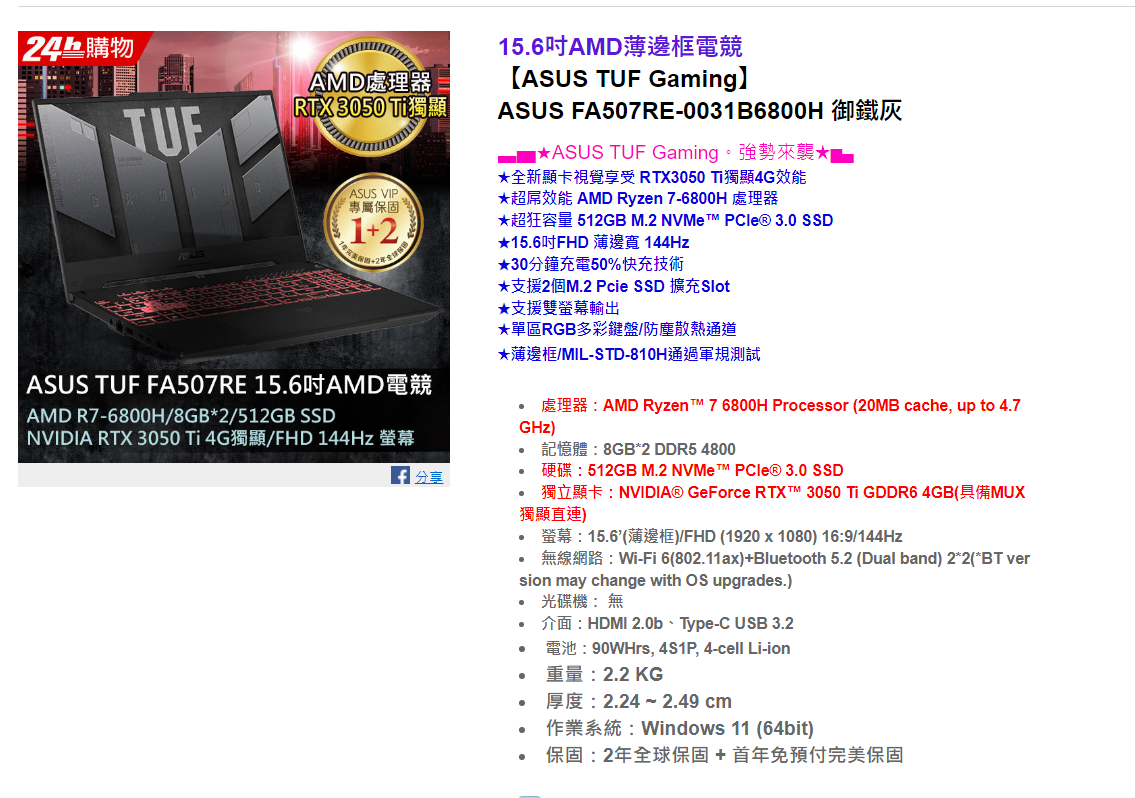

### AMD R7-6800H

第15行 為記憶體8GB*2 = 16GB

In [ ]:
data5 = data3[data3['標題'].str.contains('8G')]
data5

,標題,價格,敘述,網址,規格
3,ASUS ROG Strix G15 G513RC-0042F6800H 潮魂黑(R7-68...,36900,AMD 6000系列★RTX3050獨顯★[Strix G 進化 經典潮流]ROG Stri...,https://24h.pchome.com.tw/prod/DHAS4M-A900E4H9I,▃▅★ASUS ROG STRIX G 。強勢來襲★▅▃ \n★全新升級 144Hz 薄邊框...
15,ASUS FA507RE-0031B6800H 御鐵灰(AMD R7-6800H/8GB*2...,35900,15.6吋AMD薄邊框電競【ASUS TUF Gaming】ASUS FA507RE-003...,https://24h.pchome.com.tw/prod/DHAS4J-A900EW29L,▃▅★ASUS TUF Gaming。強勢來襲★▅▃\n★全新顯卡視覺享受 RTX3050 ...
18,ASUS FA507RM-0021B6800H 御鐵灰(AMD R7-6800H/8GB/R...,39900,15.6吋AMD薄邊框電競【ASUS TUF Gaming】ASUS FA507RM-002...,https://24h.pchome.com.tw/prod/DHAS4J-A900F15NU,▃▅★ASUS TUF Gaming。強勢來襲★▅▃\n★全新顯卡視覺享受 RTX3060獨...


In [ ]:
data5_1 = data5[data5['規格'].str.contains('512GB')]
data5_1 

,標題,價格,敘述,網址,規格
3,ASUS ROG Strix G15 G513RC-0042F6800H 潮魂黑(R7-68...,36900,AMD 6000系列★RTX3050獨顯★[Strix G 進化 經典潮流]ROG Stri...,https://24h.pchome.com.tw/prod/DHAS4M-A900E4H9I,▃▅★ASUS ROG STRIX G 。強勢來襲★▅▃ \n★全新升級 144Hz 薄邊框...
15,ASUS FA507RE-0031B6800H 御鐵灰(AMD R7-6800H/8GB*2...,35900,15.6吋AMD薄邊框電競【ASUS TUF Gaming】ASUS FA507RE-003...,https://24h.pchome.com.tw/prod/DHAS4J-A900EW29L,▃▅★ASUS TUF Gaming。強勢來襲★▅▃\n★全新顯卡視覺享受 RTX3050 ...
18,ASUS FA507RM-0021B6800H 御鐵灰(AMD R7-6800H/8GB/R...,39900,15.6吋AMD薄邊框電競【ASUS TUF Gaming】ASUS FA507RM-002...,https://24h.pchome.com.tw/prod/DHAS4J-A900F15NU,▃▅★ASUS TUF Gaming。強勢來襲★▅▃\n★全新顯卡視覺享受 RTX3060獨...


## 結論2: 如果要購買符合以下規格的筆電:
- 15.6吋
- 記憶體 8GB
- AMD R7-4800H 
- SSD 512GB

列表中兩款皆可選擇

兩台差別主要: 是否可以擴充記憶體




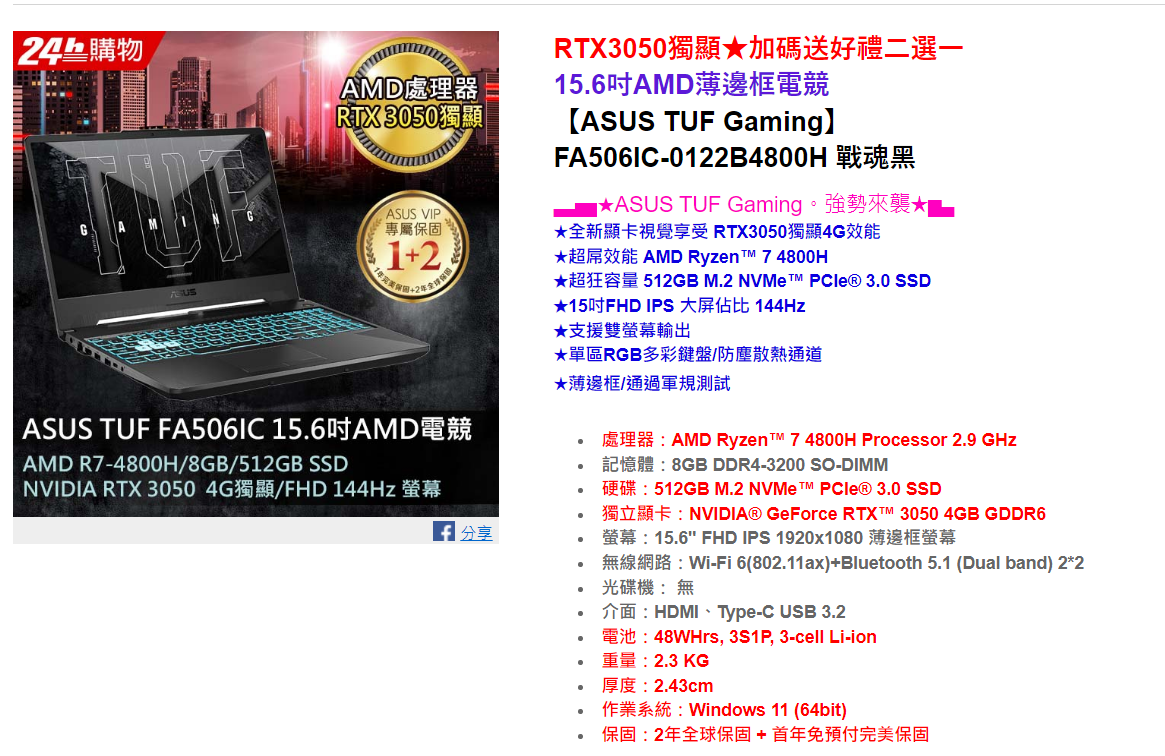

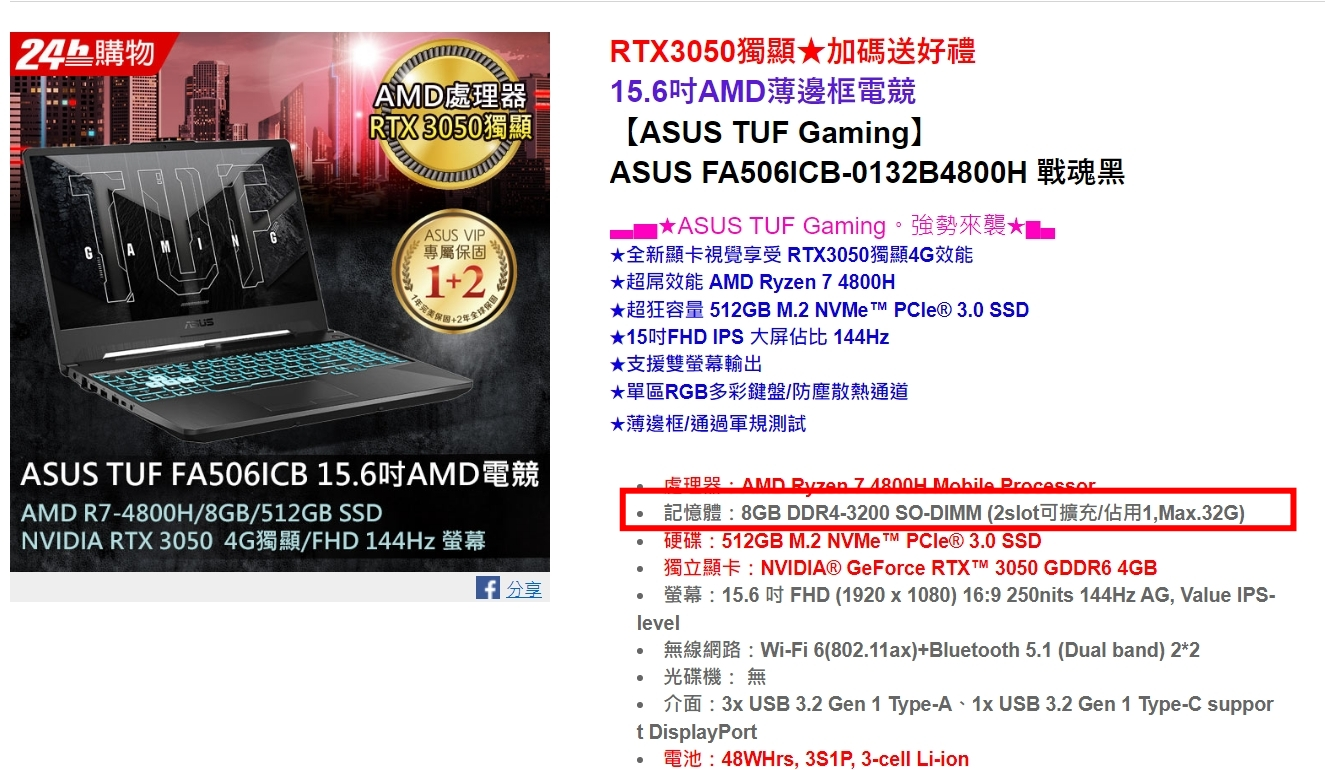

### AMD R7-4800H

In [ ]:
data6 = data4[data4['標題'].str.contains('8G')]
data6

,標題,價格,敘述,網址,規格
13,ASUS FA506IC-0122B4800H 戰魂黑(AMD R7-4800H/8G/RT...,28999,RTX3050獨顯★加碼送好禮二選一15.6吋AMD薄邊框電競【ASUS TUF Gamin...,https://24h.pchome.com.tw/prod/DHAS4J-A900ENMQ4,▃▅★ASUS TUF Gaming。強勢來襲★▅▃\n★全新顯卡視覺享受 RTX3050獨...
14,ASUS FA506ICB-0132B4800H 戰魂黑(AMD R7-4800H/8G/R...,28999,RTX3050獨顯★加碼送好禮15.6吋AMD薄邊框電競【ASUS TUF Gaming】\...,https://24h.pchome.com.tw/prod/DHAS4J-A900F36BJ,▃▅★ASUS TUF Gaming。強勢來襲★▅▃\n★全新顯卡視覺享受 RTX3050獨...


In [ ]:
data6_1 = data6[data6['規格'].str.contains('512GB')]
data6_1 

,標題,價格,敘述,網址,規格
13,ASUS FA506IC-0122B4800H 戰魂黑(AMD R7-4800H/8G/RT...,28999,RTX3050獨顯★加碼送好禮二選一15.6吋AMD薄邊框電競【ASUS TUF Gamin...,https://24h.pchome.com.tw/prod/DHAS4J-A900ENMQ4,▃▅★ASUS TUF Gaming。強勢來襲★▅▃\n★全新顯卡視覺享受 RTX3050獨...
14,ASUS FA506ICB-0132B4800H 戰魂黑(AMD R7-4800H/8G/R...,28999,RTX3050獨顯★加碼送好禮15.6吋AMD薄邊框電競【ASUS TUF Gaming】\...,https://24h.pchome.com.tw/prod/DHAS4J-A900F36BJ,▃▅★ASUS TUF Gaming。強勢來襲★▅▃\n★全新顯卡視覺享受 RTX3050獨...
